In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neurodsp.sim import sim_synaptic_current

from neurodsp.spectral import compute_spectrum

from timescales.fit import PSD
from timescales.sim import sim_lorentzian

## Double Knee Fits

I was recreating the excitation/inhibition figure from Gao et al. 2017, and found that the double knee model is aligned with the EI model. If the LFP is the sum of exicitatory and inhibitory inputs, and the difference between the timescales of the inputs is large ($\tau_{\text{excitatory}} - \tau_{\text{inhibitory}} >> 0$), the double knee model can decompose the LFP's PSD into excitatory and inhibitory components (last figure in this notebook).

From Gao et al., 2017:

<img src="ei.png" style="height: 200px;"/>

### Simulations
Simulate an excitatory synaptic current with $\tau = 0.016, f_k = 100$ and an inhibitory current with $\tau = 0.032, f_k = 5$. Take the sum to be the LFP as in Gao et al., 2017.

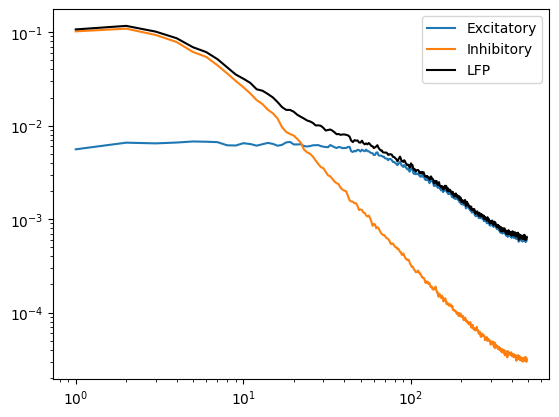

In [2]:
# Simulate exitiatory and inhibitory currents
tau0 = 1/(2*np.pi*100)
tau1 = 1/(2*np.pi*5)

sig0 = sim_synaptic_current(1000, 1000, tau_d=tau0)
sig1 = sim_synaptic_current(1000, 1000, tau_d=tau1)


# Plot
freqs_fast, powers_fast = compute_spectrum(sig0, 1000, f_range=(.1, 490))
freqs_slow, powers_slow = compute_spectrum(sig1, 1000, f_range=(.1, 490))

freqs, powers = compute_spectrum(sig0+sig1, 1000, f_range=(.1, 490))

plt.loglog(freqs_fast, powers_fast, label='Excitatory')
plt.loglog(freqs_slow, powers_slow, label='Inhibitory')
plt.loglog(freqs, powers, label='LFP', color='k')
plt.legend();

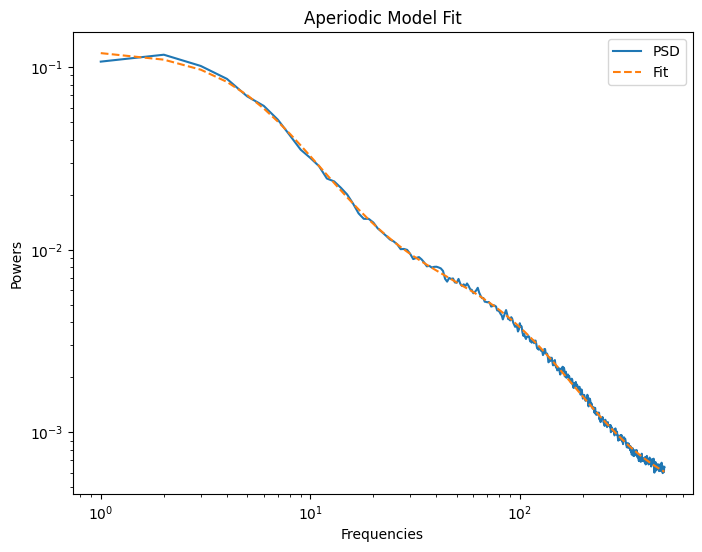

In [3]:
# Fit LFP (sum of currents) with a double knee model
psd = PSD(freqs, powers)
psd.fit(ap_mode='double')
psd.plot()

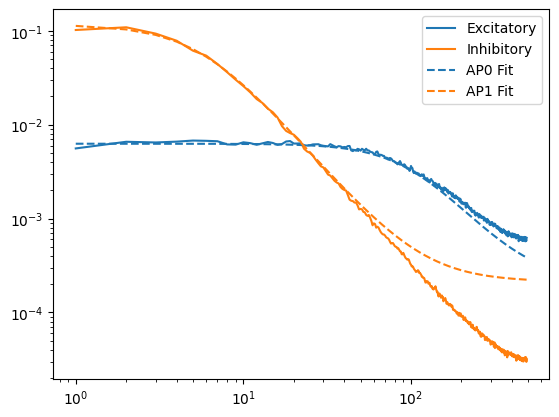

In [4]:
# Above, the sum of two knee fits is plotted
# Blow, the two knee fits are plotted separately
plt.loglog(freqs_fast, powers_fast, label='Excitatory', color='C0')
plt.loglog(freqs_slow, powers_slow, label='Inhibitory', color='C1')


plt.loglog(freqs, sim_lorentzian(freqs, psd.params[5], psd.params[6],psd.params[4], psd.params[7]),
           color='C0', ls='--', label='AP0 Fit')

plt.loglog(freqs, sim_lorentzian(freqs, psd.params[1], psd.params[2],psd.params[0], psd.params[3]),
           color='C1', ls='--', label='AP1 Fit')
plt.legend();